In [266]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [267]:
# Import our input dataset
ny_df = pd.read_csv('column_listings_df.csv')
ny_df.head()

,listing_id,listing_url,name,host_id,host_url,host_name,host_since,host_is_superhost,host_listings_count,host_total_listings_count,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,52702018,https://www.airbnb.com/rooms/52702018,Rental unit in Queens · ★4.90 · 1 bedroom · 2 ...,93231383,https://www.airbnb.com/users/show/93231383,Daniel,2016-09-03,t,3.0,3.0,...,2023-08-21,4.90,4.95,4.90,4.95,4.94,4.85,4.87,3,8.53
1,784969376930125242,https://www.airbnb.com/rooms/784969376930125242,Home in Queens · ★4.97 · 3 bedrooms · 4 beds ·...,93231383,https://www.airbnb.com/users/show/93231383,Daniel,2016-09-03,t,3.0,3.0,...,2023-08-15,4.97,4.97,4.97,4.95,4.95,4.84,4.87,3,4.47
2,9919728,https://www.airbnb.com/rooms/9919728,Townhouse in Queens · ★4.33 · 3 bedrooms · 7 b...,50997424,https://www.airbnb.com/users/show/50997424,Mark,2015-12-10,f,10.0,10.0,...,2020-02-18,4.33,4.17,4.33,4.83,4.67,4.83,4.33,7,0.09
3,53696990,https://www.airbnb.com/rooms/53696990,Vacation home in Queens · Studio · 2 beds · 1 ...,50997424,https://www.airbnb.com/users/show/50997424,Mark,2015-12-10,f,10.0,10.0,...,2022-09-16,4.00,4.00,3.00,5.00,4.00,5.00,3.00,7,0.08
4,9920363,https://www.airbnb.com/rooms/9920363,Townhouse in Queens · ★4.25 · 5 bedrooms · 11 ...,50997424,https://www.airbnb.com/users/show/50997424,Mark,2015-12-10,f,10.0,10.0,...,2020-01-01,4.25,4.25,3.75,4.75,4.00,4.75,4.50,7,0.09


In [268]:
ny_df.columns

Index(['listing_id', 'listing_url', 'name', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'has_availability',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [269]:
ny_df=ny_df[['latitude','longitude','host_is_superhost','neighbourhood_cleansed','review_scores_communication','review_scores_cleanliness','host_total_listings_count','number_of_reviews','review_scores_accuracy', 'neighbourhood_group_cleansed','beds','review_scores_rating','price']]
ny_df=pd.get_dummies(ny_df, columns=['neighbourhood_group_cleansed','host_is_superhost','neighbourhood_cleansed'], prefix=['neighbourhood_group_cleansed','host_is_superhost','neighbourhood_cleansed'])

ny_df['price']= ny_df['price'].str.extract('(\d+\.\d+|\d+)').astype(float)
ny_df = ny_df[ny_df['price'] <= 1000]
ny_df.head(3)

,latitude,longitude,review_scores_communication,review_scores_cleanliness,host_total_listings_count,number_of_reviews,review_scores_accuracy,beds,review_scores_rating,price,...,neighbourhood_cleansed_Upper East Side,neighbourhood_cleansed_Upper West Side,neighbourhood_cleansed_Vinegar Hill,neighbourhood_cleansed_Washington Heights,neighbourhood_cleansed_West Village,neighbourhood_cleansed_Whitestone,neighbourhood_cleansed_Williamsburg,neighbourhood_cleansed_Windsor Terrace,neighbourhood_cleansed_Woodhaven,neighbourhood_cleansed_Woodside
0,40.769110,-73.870530,4.94,4.90,3.0,188,4.95,2.0,4.90,171.0,...,0,0,0,0,0,0,0,0,0,0
1,40.768176,-73.871263,4.95,4.97,3.0,38,4.97,4.0,4.97,311.0,...,0,0,0,0,0,0,0,0,0,0
2,40.717340,-73.878050,4.67,4.33,10.0,8,4.17,7.0,4.33,328.0,...,0,0,0,0,0,0,0,0,0,0


In [270]:
ny_df = ny_df.dropna()

In [271]:
y = ny_df['price']
X = ny_df.drop(['price'], axis=1)

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [272]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [273]:
train_data=X_train.join(y_train)

In [274]:
train_data

,latitude,longitude,review_scores_communication,review_scores_cleanliness,host_total_listings_count,number_of_reviews,review_scores_accuracy,beds,review_scores_rating,neighbourhood_group_cleansed_Brooklyn,...,neighbourhood_cleansed_Upper West Side,neighbourhood_cleansed_Vinegar Hill,neighbourhood_cleansed_Washington Heights,neighbourhood_cleansed_West Village,neighbourhood_cleansed_Whitestone,neighbourhood_cleansed_Williamsburg,neighbourhood_cleansed_Windsor Terrace,neighbourhood_cleansed_Woodhaven,neighbourhood_cleansed_Woodside,price
23595,40.642600,-73.998510,4.00,2.50,1.0,3,3.50,2.0,4.00,1,...,0,0,0,0,0,0,0,0,0,200.0
17408,40.798890,-73.961860,4.85,4.93,1.0,84,4.90,2.0,4.86,0,...,1,0,0,0,0,0,0,0,0,390.0
13804,40.747840,-73.988340,4.77,4.73,9.0,142,4.75,3.0,4.56,0,...,0,0,0,0,0,0,0,0,0,281.0
4476,40.660214,-73.924742,4.91,4.50,4.0,32,4.88,1.0,4.78,1,...,0,0,0,0,0,0,0,0,0,66.0
4119,40.754920,-73.835310,5.00,5.00,1.0,5,5.00,4.0,5.00,0,...,0,0,0,0,0,0,0,0,0,388.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3466,40.651850,-73.958880,5.00,5.00,6.0,4,5.00,2.0,4.75,1,...,0,0,0,0,0,0,0,0,0,290.0
3762,40.678780,-73.912650,5.00,4.78,19.0,9,4.78,3.0,4.56,1,...,0,0,0,0,0,0,0,0,0,420.0
18368,40.796810,-73.934850,4.88,4.83,1.0,48,4.88,3.0,4.85,0,...,0,0,0,0,0,0,0,0,0,565.0
6391,40.688650,-73.912970,4.94,4.76,3.0,17,4.94,1.0,4.88,1,...,0,0,0,0,0,0,0,0,0,153.0


<Axes: xlabel='latitude', ylabel='longitude'>

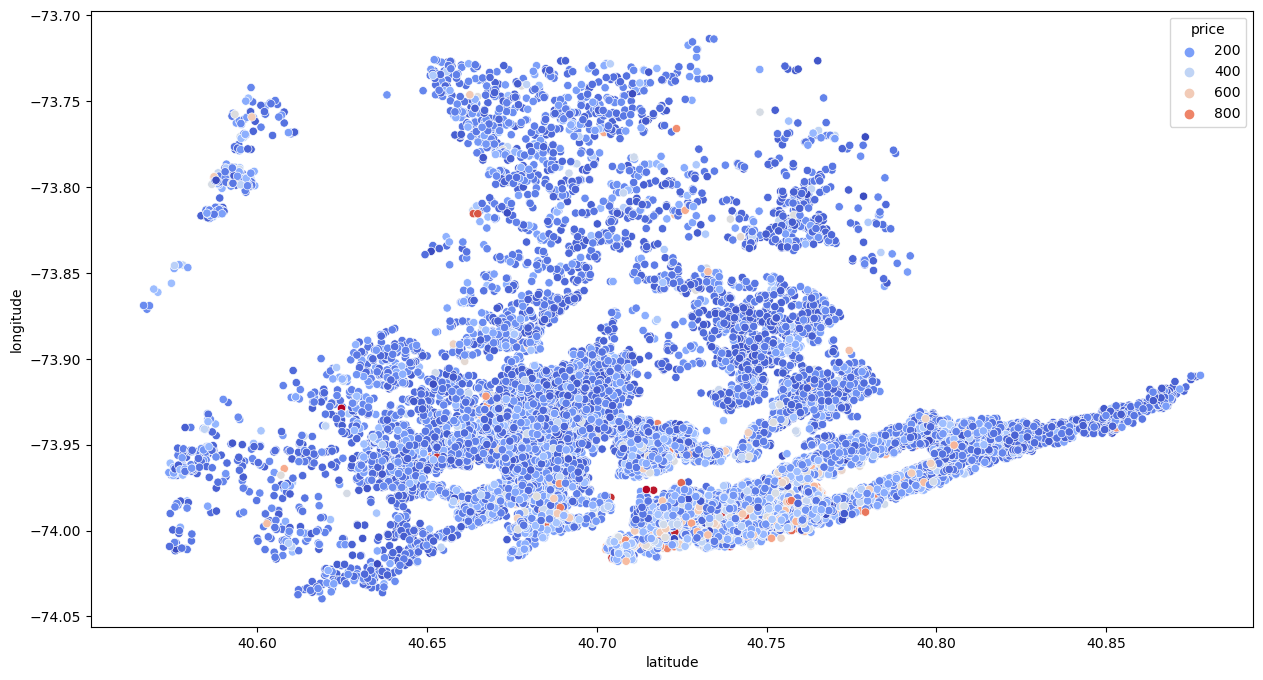

In [275]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='price', palette='coolwarm')

LogisticRegression

In [276]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [277]:
X_train, y_train = ny_df.drop(['price','latitude','longitude'],axis=1), ny_df['price']
X_test, y_test = ny_df.drop(['price','latitude','longitude'],axis=1), ny_df['price']

reg = LinearRegression()

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
r2_1 = r2_score(y_test, y_pred)
print("Root Mean Squared Error (RMSE):", rmse)
print(f"R-squared (R2) Score: {r2_1}")

Root Mean Squared Error (RMSE): 113.43862636899456
R-squared (R2) Score: 0.3234456560728811


In [278]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rf_regressor.score(X_test,y_test)
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 2114.8617067300424
R-squared (R2) Score: 0.8888107649329446


In [279]:

test_data = X_test.join(y_test)
test_data

,review_scores_communication,review_scores_cleanliness,host_total_listings_count,number_of_reviews,review_scores_accuracy,beds,review_scores_rating,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,...,neighbourhood_cleansed_Upper West Side,neighbourhood_cleansed_Vinegar Hill,neighbourhood_cleansed_Washington Heights,neighbourhood_cleansed_West Village,neighbourhood_cleansed_Whitestone,neighbourhood_cleansed_Williamsburg,neighbourhood_cleansed_Windsor Terrace,neighbourhood_cleansed_Woodhaven,neighbourhood_cleansed_Woodside,price
0,4.94,4.90,3.0,188,4.95,2.0,4.90,0,0,1,...,0,0,0,0,0,0,0,0,0,171.0
1,4.95,4.97,3.0,38,4.97,4.0,4.97,0,0,1,...,0,0,0,0,0,0,0,0,0,311.0
2,4.67,4.33,10.0,8,4.17,7.0,4.33,0,0,1,...,0,0,0,0,0,0,0,0,0,328.0
3,4.00,3.00,10.0,1,4.00,2.0,4.00,0,0,1,...,0,0,0,0,0,0,0,0,0,139.0
4,4.00,3.75,10.0,8,4.25,11.0,4.25,0,0,1,...,0,0,0,0,0,0,0,0,0,485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27702,1.00,4.00,1.0,1,4.00,2.0,1.00,0,1,0,...,0,0,0,0,0,0,0,0,0,150.0
27703,5.00,4.77,1.0,30,5.00,1.0,4.87,1,0,0,...,0,0,0,0,0,0,0,0,0,95.0
27704,5.00,4.00,2.0,2,5.00,2.0,5.00,0,1,0,...,1,0,0,0,0,0,0,0,0,250.0
27705,5.00,4.33,5.0,3,5.00,2.0,5.00,1,0,0,...,0,0,0,0,0,0,0,0,0,180.0


In [280]:
X_train, y_train = ny_df.drop(['price','latitude','longitude'],axis=1), ny_df['price']
train_data=X_train.join(y_train)
train_data

,review_scores_communication,review_scores_cleanliness,host_total_listings_count,number_of_reviews,review_scores_accuracy,beds,review_scores_rating,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,...,neighbourhood_cleansed_Upper West Side,neighbourhood_cleansed_Vinegar Hill,neighbourhood_cleansed_Washington Heights,neighbourhood_cleansed_West Village,neighbourhood_cleansed_Whitestone,neighbourhood_cleansed_Williamsburg,neighbourhood_cleansed_Windsor Terrace,neighbourhood_cleansed_Woodhaven,neighbourhood_cleansed_Woodside,price
0,4.94,4.90,3.0,188,4.95,2.0,4.90,0,0,1,...,0,0,0,0,0,0,0,0,0,171.0
1,4.95,4.97,3.0,38,4.97,4.0,4.97,0,0,1,...,0,0,0,0,0,0,0,0,0,311.0
2,4.67,4.33,10.0,8,4.17,7.0,4.33,0,0,1,...,0,0,0,0,0,0,0,0,0,328.0
3,4.00,3.00,10.0,1,4.00,2.0,4.00,0,0,1,...,0,0,0,0,0,0,0,0,0,139.0
4,4.00,3.75,10.0,8,4.25,11.0,4.25,0,0,1,...,0,0,0,0,0,0,0,0,0,485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27702,1.00,4.00,1.0,1,4.00,2.0,1.00,0,1,0,...,0,0,0,0,0,0,0,0,0,150.0
27703,5.00,4.77,1.0,30,5.00,1.0,4.87,1,0,0,...,0,0,0,0,0,0,0,0,0,95.0
27704,5.00,4.00,2.0,2,5.00,2.0,5.00,0,1,0,...,1,0,0,0,0,0,0,0,0,250.0
27705,5.00,4.33,5.0,3,5.00,2.0,5.00,1,0,0,...,0,0,0,0,0,0,0,0,0,180.0


In [281]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (26942, 143)
y_test shape: (26942,)


In [282]:
print("Missing values in X_test:")
print(X_test.isnull().sum())

print("Missing values in y_test:")
print(y_test.isnull().sum())

Missing values in X_test:
review_scores_communication               0
review_scores_cleanliness                 0
host_total_listings_count                 0
number_of_reviews                         0
review_scores_accuracy                    0
                                         ..
neighbourhood_cleansed_Whitestone         0
neighbourhood_cleansed_Williamsburg       0
neighbourhood_cleansed_Windsor Terrace    0
neighbourhood_cleansed_Woodhaven          0
neighbourhood_cleansed_Woodside           0
Length: 143, dtype: int64
Missing values in y_test:
0


#Deep Learning

In [283]:
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=286, activation="relu", input_dim=143))
nn.add(tf.keras.layers.Dense(units=286, activation="relu"))
nn.add(tf.keras.layers.Dense(units=286, activation="relu"))
nn.add(tf.keras.layers.Dense(units=286, activation="relu"))
nn.add(tf.keras.layers.Dense(units=286, activation="relu"))
nn.add(tf.keras.layers.Dense(units=286, activation="relu"))
nn.add(tf.keras.layers.Dense(units=286, activation="relu"))
nn.add(tf.keras.layers.Dense(units=286, activation="relu"))
nn.add(tf.keras.layers.Dense(units=286, activation="relu"))
nn.add(tf.keras.layers.Dense(units=286, activation="relu"))
nn.add(tf.keras.layers.Dense(units=1))

nn.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_230 (Dense)           (None, 286)               41184     
                                                                 
 dense_231 (Dense)           (None, 286)               82082     
                                                                 
 dense_232 (Dense)           (None, 286)               82082     
                                                                 
 dense_233 (Dense)           (None, 286)               82082     
                                                                 
 dense_234 (Dense)           (None, 286)               82082     
                                                                 
 dense_235 (Dense)           (None, 286)               82082     
                                                                 
 dense_236 (Dense)           (None, 286)             

In [284]:
nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [285]:
#fit_model = nn.fit(X_train,y_train,epochs=30)

fit_model = nn.fit(X_train, y_train, epochs=600, validation_split=0.2)

Epoch 1/400
674/674 [==============================] - 4s 4ms/step - loss: 22421.3535 - mean_absolute_error: 98.9295 - val_loss: 10688.4404 - val_mean_absolute_error: 68.6632
Epoch 2/400
674/674 [==============================] - 3s 4ms/step - loss: 16931.0176 - mean_absolute_error: 84.6589 - val_loss: 10241.8926 - val_mean_absolute_error: 68.7558
Epoch 3/400
674/674 [==============================] - 3s 4ms/step - loss: 15441.8809 - mean_absolute_error: 80.3356 - val_loss: 10176.8545 - val_mean_absolute_error: 69.5809
Epoch 4/400
674/674 [==============================] - 3s 4ms/step - loss: 14734.9004 - mean_absolute_error: 78.4282 - val_loss: 10309.5908 - val_mean_absolute_error: 71.0543
Epoch 5/400
674/674 [==============================] - 3s 4ms/step - loss: 14347.6445 - mean_absolute_error: 77.1769 - val_loss: 11024.7754 - val_mean_absolute_error: 63.6399
Epoch 6/400
674/674 [==============================] - 3s 4ms/step - loss: 14520.1699 - mean_absolute_error: 78.0165 - val_lo

In [289]:
test_loss, test_mae = nn.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

842/842 [==============================] - 1s 1ms/step - loss: 6666.1704 - mean_absolute_error: 49.4866
Test Loss: 6666.17041015625, Test MAE: 49.486576080322266


In [290]:
# Calculate predictions using the deep learning model
y_pred_nn = nn.predict(X_test)

# Calculate Mean Squared Error (MSE) for the deep learning model
mse_nn = mean_squared_error(y_test, y_pred_nn)

# Calculate Root Mean Squared Error (RMSE) for the deep learning model
rmse_nn = np.sqrt(mse_nn)

# Calculate R-squared for the deep learning model
r2_nn = r2_score(y_test, y_pred_nn)

print("Deep Learning Model - Root Mean Squared Error (RMSE):", rmse_nn)
print("Deep Learning Model - R-squared:", r2_nn)

842/842 [==============================] - 1s 1ms/step
Deep Learning Model - Root Mean Squared Error (RMSE): 81.64662273937576
Deep Learning Model - R-squared: 0.649524859008429


In [288]:
nn.save('price_predict.h5')

c:\Users\and_i\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
